In [1]:
import os
import datasets as hfds
import huggingface_hub as hfhub
import torch

import sys
sys.path.insert(0, "../src")
from exlib.datasets.mvtec import *

/home/antonxue/lib/miniconda3/envs/exlib/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hfhub.login(os.getenv("HF_TOKEN"))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/antonxue/.cache/huggingface/token
Login successful


In [88]:
mvtec_dataset = MVTecDataset("zipper", "test")

In [89]:
import matplotlib.pyplot as plt

In [90]:
item = mvtec_dataset[0]

In [91]:
item["image"].shape, item["mask"].dtype

(torch.Size([1, 256, 256]), torch.int64)

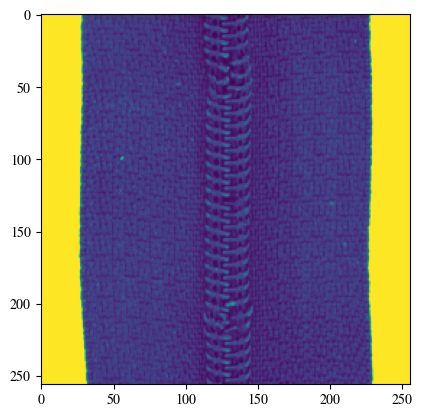

In [92]:
plt.imshow(item["image"].numpy().transpose(1,2,0))

In [93]:
item["image"].min(), item["image"].max()

(tensor(0.0992), tensor(1.))

In [94]:
MVTEC_CATEGORIES = [
    "bottle",
    "cable",
    "capsule",
    "carpet",
    "grid",
    "hazelnut",
    "leather",
    "metal_nut",
    "pill",
    "screw",
    "tile",
    "toothbrush",
    "transistor",
    "wood",
    "zipper",
]

In [95]:
hfds_all = hfds.DatasetDict()

for cat in MVTEC_CATEGORIES:
    mvtec_train = MVTec("/home/antonxue/foo/data/mvtec-ad", cat, split="train", image_size=512)
    mvtec_test = MVTec("/home/antonxue/foo/data/mvtec-ad", cat, split="test", image_size=512)
    
    def gen_train():
        for item in mvtec_train:
            yield {
                "image": item["image"],
                "mask": item["mask"],
                "label": item["label"]
            }
            
    def gen_test():
        for item in mvtec_test:
            yield {
                "image": item["image"],
                "mask": item["mask"].tolist(),
                "label": item["label"]
            }

    hfds_all[f"{cat}.train"] = hfds.Dataset.from_generator(gen_train)
    hfds_all[f"{cat}.test"] = hfds.Dataset.from_generator(gen_test)

In [5]:
# hfds_all.push_to_hub("BrachioLab/mvtec-ad")

Uploading the dataset shards: 100%|██████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.48s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/BrachioLab/mvtec-ad/commit/63da9f67ba5216b5a8d1e043d7398718f7fd139b', commit_message='Upload dataset (part 00001-of-00002)', commit_description='', oid='63da9f67ba5216b5a8d1e043d7398718f7fd139b', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
bottle_train = hfds.load_dataset("BrachioLab/mvtec-ad", split="bottle.train")

In [ ]:
bottle_train[0]["image"]